In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [69]:
df=pd.read_csv(r'C:\Users\pnaik27\Anaconda\Algorithm\Linear Regression\DataSet\CAR DETAILS FROM CAR DEKHO.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


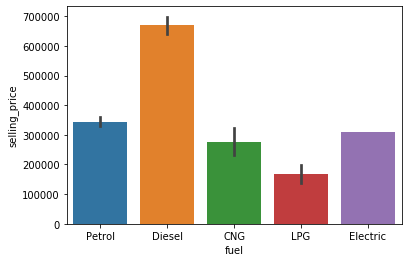

In [6]:
sns.barplot(x='fuel',y='selling_price',data=df)

The Selling price for Diesel vehicle is the highest followed by petrol,Electric,CNG,LPG.

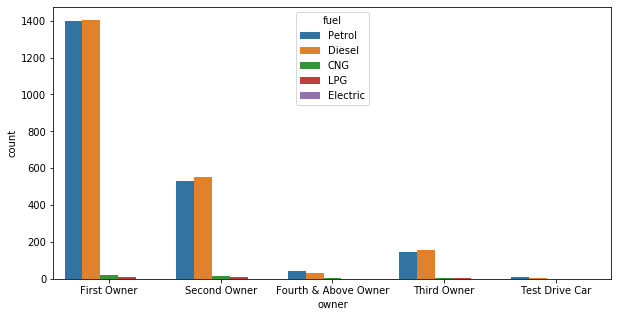

In [10]:
plt.figure(figsize=(10,5),facecolor='white')
sns.countplot(x='owner',hue='fuel',data=df)

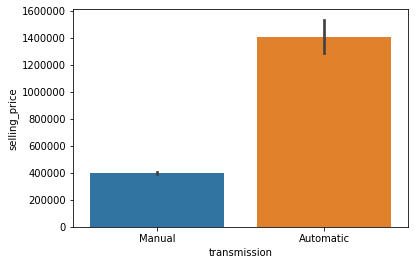

In [12]:
sns.barplot(x='transmission',y='selling_price',data=df)

Vehicles with Automatic transmission have highest selling price as compare to manual

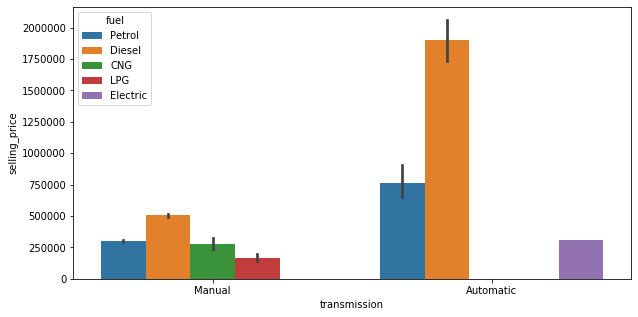

In [15]:
plt.figure(figsize=(10,5),facecolor='white')
sns.barplot(x='transmission',y='selling_price',hue='fuel',data=df)

Again the selling price of Diesel vehicle with Automatic transmission is highest as compare to other fuel type

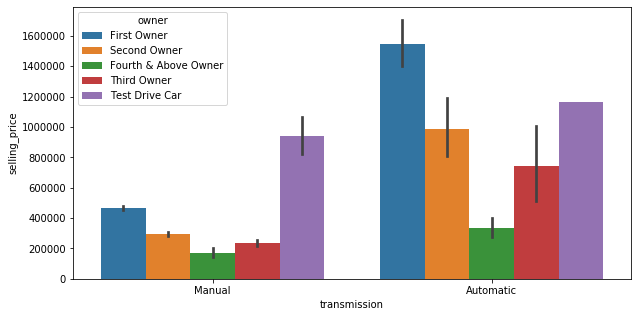

In [17]:
plt.figure(figsize=(10,5),facecolor='white')
sns.barplot(x='transmission',y='selling_price',hue='owner',data=df)

selling prices of test drive car with manual transmission  is highest as compare to other types of owner but in Automatic transmission the selling price of First owner is highest among all

<Figure size 720x360 with 0 Axes>

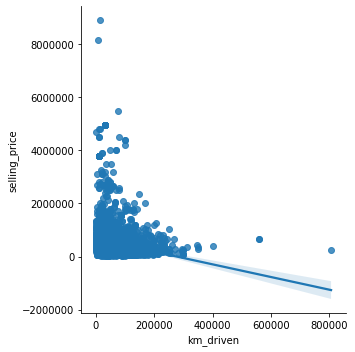

In [22]:
plt.figure(figsize=(10,5),facecolor='white')
sns.lmplot(y='selling_price',x='km_driven',data=df)

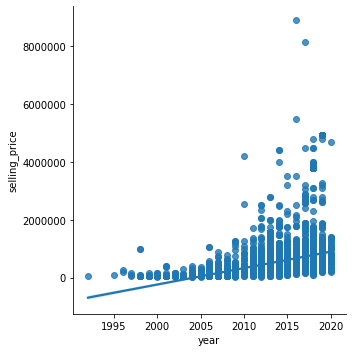

In [23]:
sns.lmplot(y='selling_price',x='year',data=df)

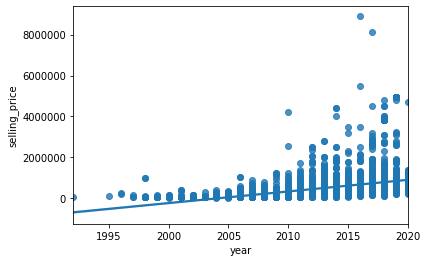

In [24]:
sns.regplot(y='selling_price',x='year',data=df)

In [125]:
df['Age']=2020-df['year']

TypeError: 'NoneType' object is not subscriptable

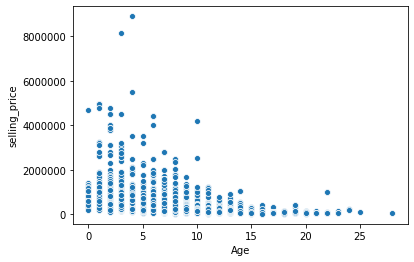

In [29]:
sns.scatterplot(x='Age',y='selling_price',data=df)

In [31]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,13
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,13
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,8


<Figure size 2160x1440 with 0 Axes>

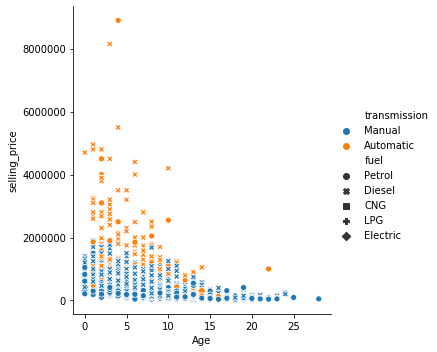

In [40]:
plt.figure(figsize=(30,20),facecolor='white')
sns.relplot(x='Age',y='selling_price',hue='transmission',style='fuel',data=df)

<Figure size 2160x1440 with 0 Axes>

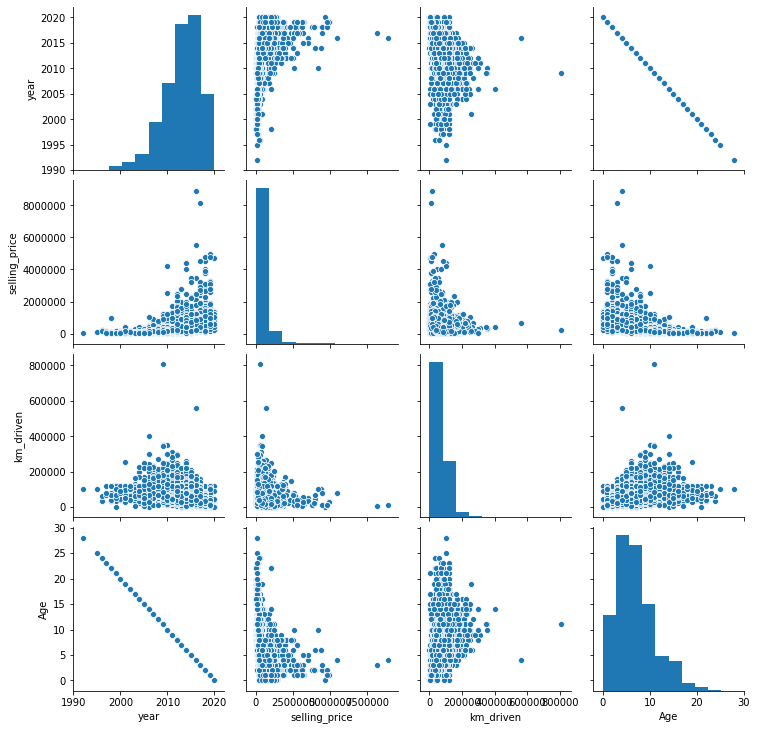

In [42]:
plt.figure(figsize=(30,20),facecolor='white')
sns.pairplot(df)

In [48]:
import copy 
df_copy=copy.deepcopy(df)

In [72]:
df.drop(columns='year',inplace=True)

In [73]:
df.columns

Index(['name', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [76]:
df_fuel=pd.get_dummies(df['fuel'],prefix='fuel',drop_first=True)
df_transmission=pd.get_dummies(df['transmission'],prefix='transmission',drop_first=True)
df_seller=pd.get_dummies(df['seller_type'],prefix='seller_type',drop_first=True)
df_owner=pd.get_dummies(df['owner'],prefix='owner',drop_first=True)

In [83]:
data=pd.concat([df,df_fuel,df_transmission,df_seller,df_owner],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   name                          4340 non-null   object
 1   selling_price                 4340 non-null   int64 
 2   km_driven                     4340 non-null   int64 
 3   fuel                          4340 non-null   object
 4   seller_type                   4340 non-null   object
 5   transmission                  4340 non-null   object
 6   owner                         4340 non-null   object
 7   fuel_Diesel                   4340 non-null   uint8 
 8   fuel_Electric                 4340 non-null   uint8 
 9   fuel_LPG                      4340 non-null   uint8 
 10  fuel_Petrol                   4340 non-null   uint8 
 11  transmission_Manual           4340 non-null   uint8 
 12  seller_type_Individual        4340 non-null   uint8 
 13  seller_type_Trustm

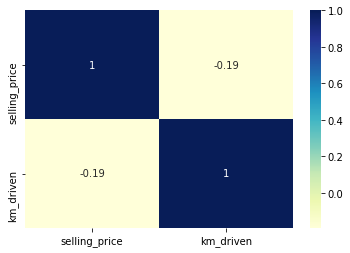

In [88]:
a=df.corr()
ind=a.index

sns.heatmap(df[ind].corr(),annot=True,cmap="YlGnBu")

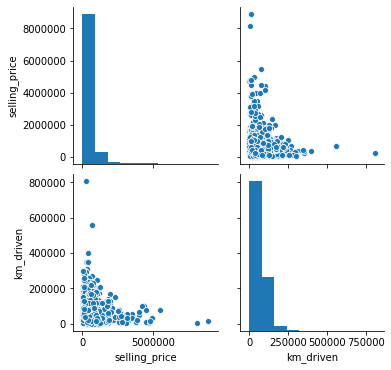

In [89]:
sns.pairplot(df)

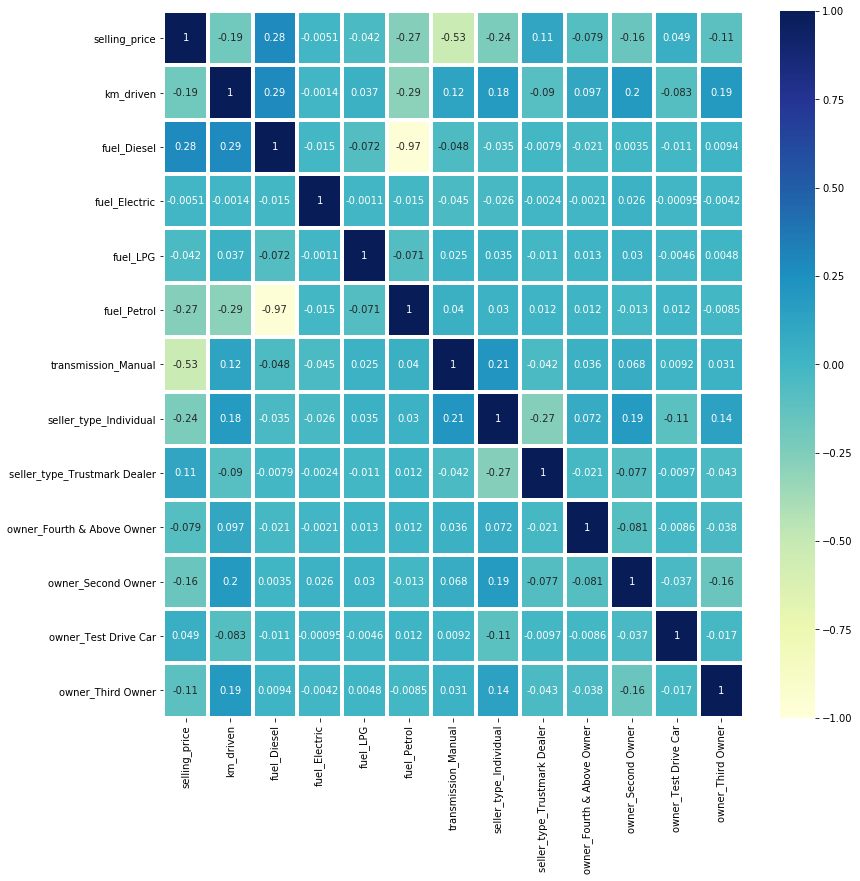

In [96]:
a=data.corr()
plt.figure(figsize=(13,13))
sns.heatmap(a,annot=True,vmin=-1,vmax=1,linewidths=3,cmap='YlGnBu')

1.Selling price of the old car decrease
2.individual seller are trying to sell more Petrol car where as the dealer are selling more disel cars
3.In general the Numbe rof diesel car for sale are slightlighly more than petrol
4.The Trustmark Dealer have higher selling price as compare to individual and Dealer seller type

In [98]:
import copy
data_copy=copy.deepcopy(data)

In [121]:
data=data_copy

In [122]:
data

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,transmission_Manual,seller_type_Individual,seller_type_Trustmark Dealer,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,0,0,0,1,1,1,0,0,0,0,0
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,0,0,0,1,1,1,0,0,0,0,0
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,1,0,0,0,1,1,0,0,0,0,0
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,0,0,0,1,1,1,0,0,0,0,0
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,1,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),409999,80000,Diesel,Individual,Manual,Second Owner,1,0,0,0,1,1,0,0,1,0,0
4336,Hyundai i20 Magna 1.4 CRDi,409999,80000,Diesel,Individual,Manual,Second Owner,1,0,0,0,1,1,0,0,1,0,0
4337,Maruti 800 AC BSIII,110000,83000,Petrol,Individual,Manual,Second Owner,0,0,0,1,1,1,0,0,1,0,0
4338,Hyundai Creta 1.6 CRDi SX Option,865000,90000,Diesel,Individual,Manual,First Owner,1,0,0,0,1,1,0,0,0,0,0


In [135]:
var=['selling_price','km_driven','Age']

In [140]:
scalar=StandardScaler()
data_scaled=scaler.fit_transform(data[var])

In [145]:
data_scaled=pd.DataFrame(data_scaled,columns=['Scalled_selling_price','Scalled_km_driven','Scalled_Age'])

In [146]:
data=pd.concat([data,data_scaled],axis=1)

In [132]:
#data=pd.concat([data,df_copy['Age']],axis=1)

#data.drop(columns='owner',inplace=True)

In [149]:
data.drop(columns=['selling_price','km_driven','Age'],inplace=True)

In [152]:
y=data['Scalled_selling_price']

In [153]:
x=data

In [157]:
x.drop(columns=['Scalled_selling_price','name','fuel','seller_type','transmission'],inplace=True)

In [158]:
x

,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,transmission_Manual,seller_type_Individual,seller_type_Trustmark Dealer,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,Scalled_km_driven,Scalled_Age
0,0,0,0,1,1,1,0,0,0,0,0,0.081139,1.445074
1,0,0,0,1,1,1,0,0,0,0,0,-0.347689,1.445074
2,1,0,0,0,1,1,0,0,0,0,0,0.724381,0.258795
3,0,0,0,1,1,1,0,0,0,0,0,-0.433455,-0.927485
4,1,0,0,0,1,1,0,0,1,0,0,1.603479,-0.215717
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,1,0,0,0,1,1,0,0,1,0,0,0.295553,-0.215717
4336,1,0,0,0,1,1,0,0,1,0,0,0.295553,-0.215717
4337,0,0,0,1,1,1,0,0,1,0,0,0.359877,0.970563
4338,1,0,0,0,1,1,0,0,0,0,0,0.509967,-0.690229


In [159]:
y

0      -0.767746
1      -0.638096
2       0.165731
3      -0.439300
4      -0.093568
          ...   
4335   -0.162716
4336   -0.162716
4337   -0.681313
4338    0.623827
4339   -0.482517
Name: Scalled_selling_price, Length: 4340, dtype: float64

In [151]:
data.columns

Index(['name', 'fuel', 'seller_type', 'transmission', 'fuel_Diesel',
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'transmission_Manual',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'Scalled_selling_price',
       'Scalled_km_driven', 'Scalled_Age'],
      dtype='object')

In [162]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=355)

In [164]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [166]:
y_pred=regression.predict(x_test)

In [167]:
print(y_pred)

[ 0.9965887  -0.05475961 -0.62066046 ... -0.27917822  1.56378844
 -0.06619071]


In [169]:
summ=pd.DataFrame({"Actual": y_test, "Predicted":y_pred})
summ

,Actual,Predicted
100,-0.508447,0.996589
3134,-0.275077,-0.054760
3060,-0.491160,-0.620660
537,1.678311,1.637230
3657,-0.007135,-0.284231
...,...,...
2328,0.494177,0.540724
3082,0.597897,1.455351
1946,-0.301007,-0.279178
2906,0.770763,1.563788


In [170]:
from sklearn import metrics
print('Root mean square error:',metrics.mean_absolute_error(y_test, y_pred))

Root mean square error: 0.39203666956451755
